# Models from Scratch: Gradient Descent
## *Implementation*
***

In [15]:
import numpy as np
from IPython.display import Image, display

In [16]:
def gradient_descent(f, guess, max_iter=10000, gamma=0.001, verbose=False):
    """A very simple gradient descent implementation for minimizing a function
       
       Parameters:
           f -- the function f to be minimized (must be callable)
           guess -- initial guess (tuple/list/array of values)
    """
    i = 0
    x = np.asarray(guess)
    
    while i < max_iter:
        # Update x by subtracting the gradient vector at x
        x = x - gamma*gradient(f, x)
        
        if verbose and i % 100 == 0:
            print("Iteration {0}: x value=({1:.3f},{2:.3f}). f value={3:.3f}".format(i, list(x)[0], list(x)[1], f(x[0], x[1])))
        
        i += 1
        
    return x

In [17]:
def gradient(func, p):
    """Returns the gradient vector of func at the point p"""
    return np.array([partial_2d(func, p, var='x'), partial_2d(func, p, var='y')])

In [18]:
def partial_2d(func, point, var, step=0.01):
    """
    Computes the partial derivative of a function.
    Parameters:
        func -- Callable function of the form f(x,y)
        point -- Tuple/list/array of x and y values (length=2)
        var -- Variable of differentiation (must be 'x' or 'y')
        step -- Step size
    """
    x = point[0]
    y = point[1]

    if var == 'x': 
        return (func(x+step, y) - func(x-step, y)) / (2*step)
    elif var == 'y':
        return (func(x, y+step) - func(x, y-step)) / (2*step)

## *Application*
***

We'll test this method on two popular [optimization_test_functions](https://en.wikipedia.org/wiki/Test_functions_for_optimization): Booth's function and a simplified version of Ackley's function.

In [19]:
def booth(x, y):
    """ Defines Booth's function"""
    return (x+2*y-7)**2 + (2*x+y-5)**2

Booth's function is shown below. It achieves a global minimum of f(x,y)=0 at (1,3).

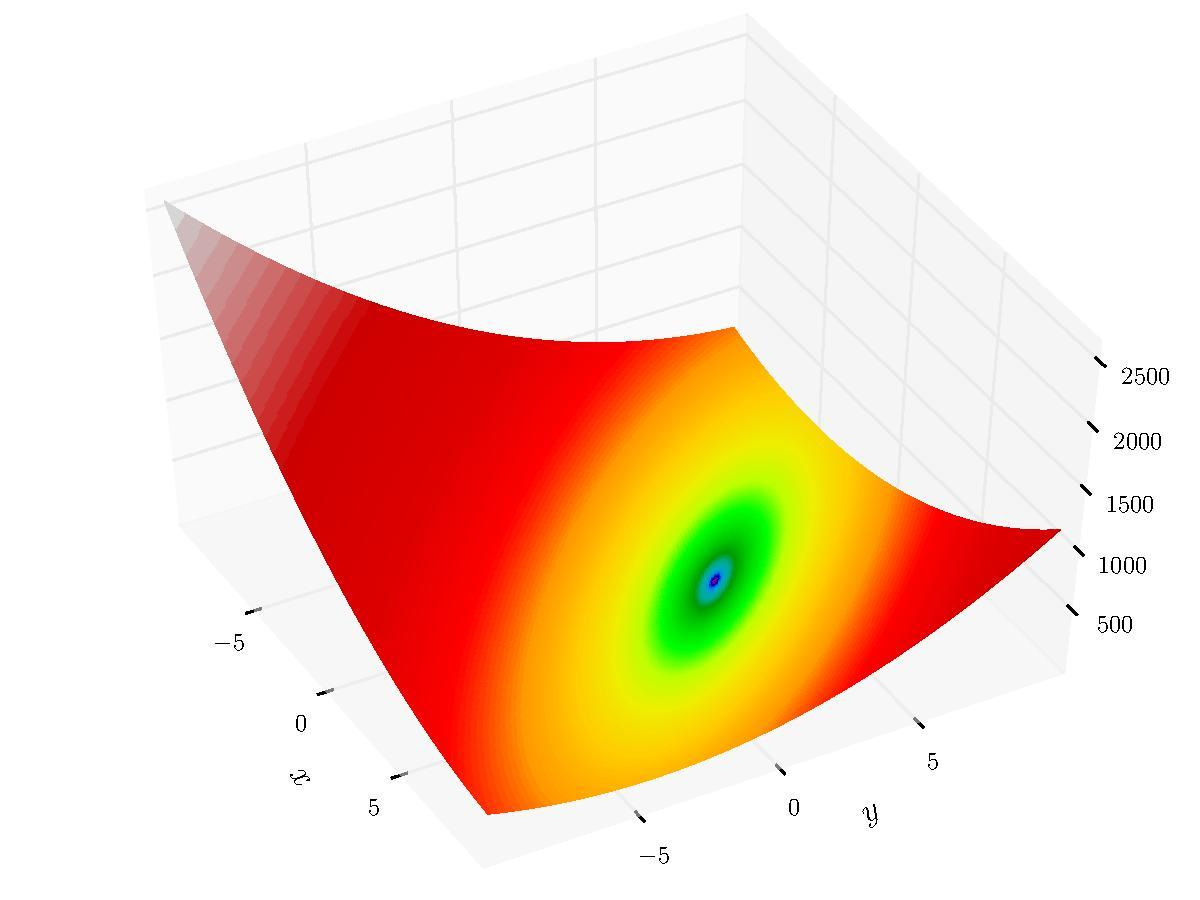

In [26]:
display(Image(filename='data/booth.jpg', width=500, height=300, embed=True))

In [21]:
min_value = gradient_descent(booth, (20, 30), max_iter=10000)
print("Solution: f({0:.2f}, {1:.2f}) = {2:.2f}".format(min_value[0], min_value[1], booth(min_value[0], min_value[1])))

Solution: f(1.00, 3.00) = 0.00


Correct!

In [27]:
def ackley(x, y):
    """Defines Ackley's function (simplified)"""
    return -20*np.exp(-0.2*np.sqrt(0.5*(x**2 + y**2)))

Ackley's function is shown below. The simplified version we're using achieves a global minimum of f(x,y)=-20 at (0,0)

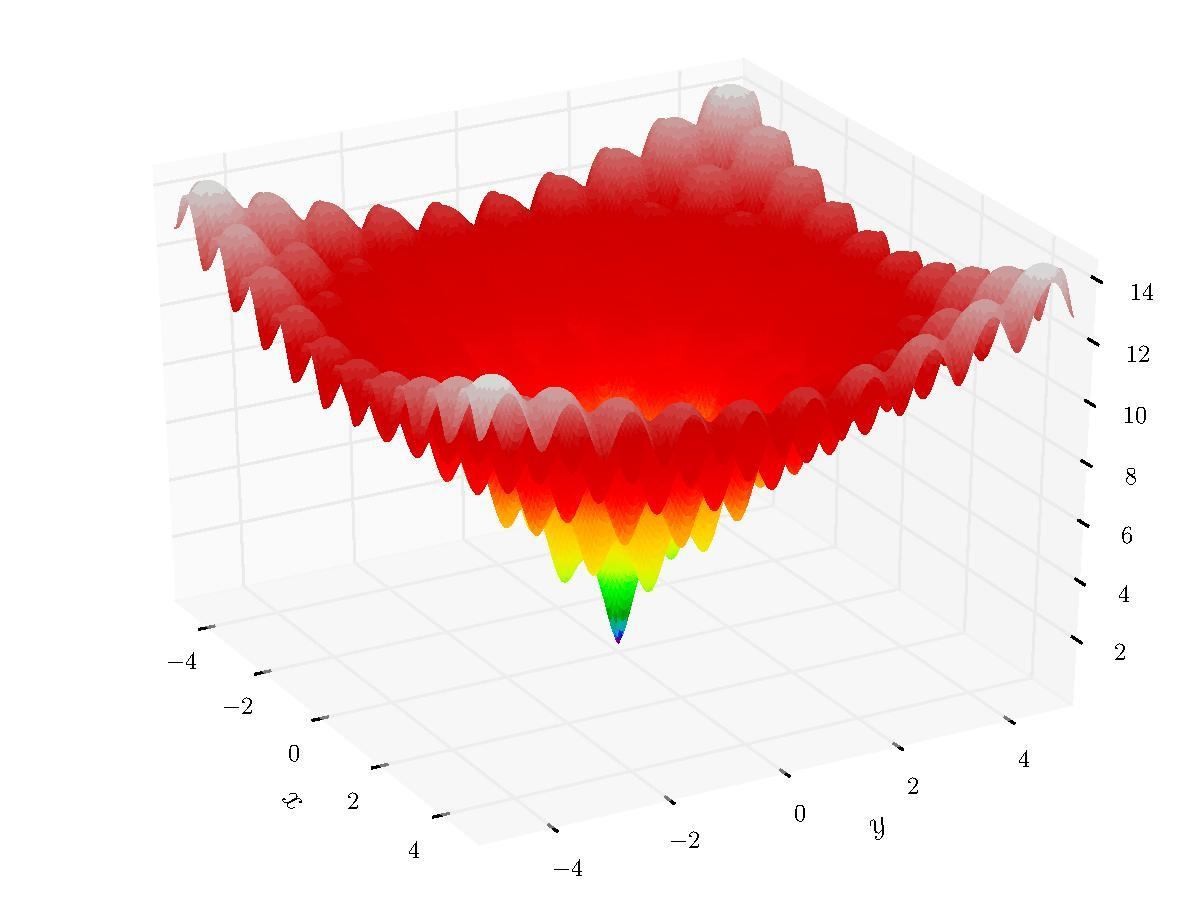

In [25]:
display(Image(filename='data/ackley.jpg', width=500, height=300, embed=True))

In [24]:
min_value = gradient_descent(ackley, (8, 8), max_iter = 10000)
f_value = ackley(min_value[0], min_value[1])
print("Solution: f({0:.2f}, {1:.2f}) = {2:.2f}".format(min_value[0], min_value[1], f_value))

Solution: f(0.00, 0.00) = -20.00


Correct!